In [2]:
import os
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid'])
mpl.rcParams["font.size"] = "16"

import numpy as np

In [3]:
seeds = [42, 451, 1984]

tiny_runs = [f'tiny_{i}' for i in [1, 5, 10, 15]]
small_runs = [f'small_{i}' for i in [1, 5, 10, 15]]
medium_runs = [f'medium_{i}' for i in [1, 5, 10, 15]]

In [4]:
def load_data(run_name):
    with open(f'./data/{run_name}.json', 'r') as file:
        result = json.loads(file.read())
    return result

def get_plotting_data(key, *names):
    result = []
    for name in names:
        result.append(load_data(name)[key])
    result = np.array(result)
    
    mean = result.mean(axis=0)
    var = result.std(axis=0)
    
    return mean, var

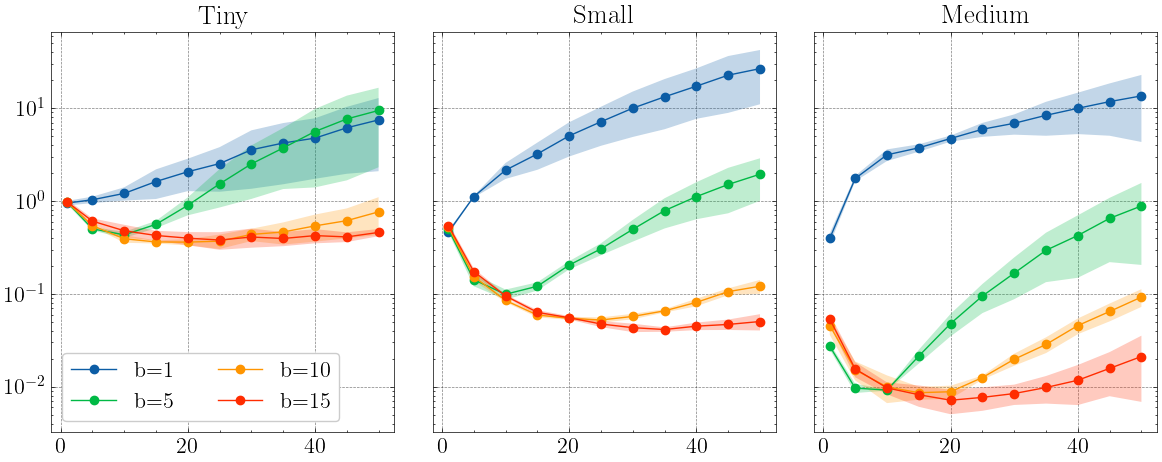

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey='row')

x = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for run in tiny_runs:
    names = [run + '_42', run + '_451', run + '_1984']
    mean, var = get_plotting_data('extr', *names)
    axs[0].plot(x, mean, label = "b=" + run[5:], marker = 'o')
    axs[0].fill_between(x, mean + var, mean - var, alpha = 0.25, linewidth = 0)
for run in small_runs:
    names = [run + '_42', run + '_451', run + '_1984']
    mean, var = get_plotting_data('extr', *names)
    axs[1].plot(x, mean, label = "b=" + run[6:], marker = 'o')
    axs[1].fill_between(x, mean + var, mean - var, alpha = 0.25, linewidth = 0)
for run in medium_runs:
    names = [run + '_42', run + '_451', run + '_1984']
    mean, var = get_plotting_data('extr', *names)
    axs[2].plot(x, mean, label = "b=" + run[7:], marker = 'o')
    axs[2].fill_between(x, mean + var, mean - var, alpha = 0.25, linewidth = 0)

axs[0].title.set_text('Tiny')
axs[1].title.set_text('Small')
axs[2].title.set_text('Medium')

for i in range(3): 
    axs[i].set_yscale('log')
axs[0].legend(loc='lower left', ncols = 2)

plt.tight_layout()
plt.savefig('./extrapolation 1.svg')
plt.show()

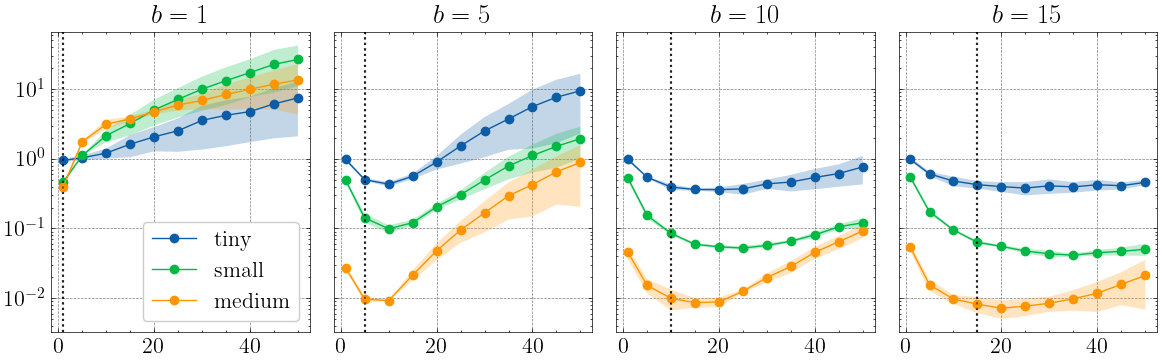

In [98]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharey='row')

x = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
names = ['tiny', 'small', 'medium']

for i in range(4):
    for name in names:
        nms = [f'{name}_{x[i]}' + f'_{seed}' for seed in [42, 451, 1984]]
        mean, var = get_plotting_data('extr', *nms)
        axs[i].plot(x, mean, label = name, marker = 'o')
        axs[i].fill_between(x, mean + var, mean - var, alpha = 0.25, linewidth = 0)
        axs[i].axvline(x=x[i], color = 'k', linestyle = ':', alpha = 0.5, linewidth = 1.5)
    axs[i].set_yscale('log')
    
axs[0].legend()
axs[0].title.set_text(r'$b = 1$')
axs[1].title.set_text(r'$b = 5$')
axs[2].title.set_text(r'$b = 10$')
axs[3].title.set_text(r'$b = 15$')

plt.tight_layout()
plt.savefig('./extrapolation 2.svg', format = 'svg')
plt.show()

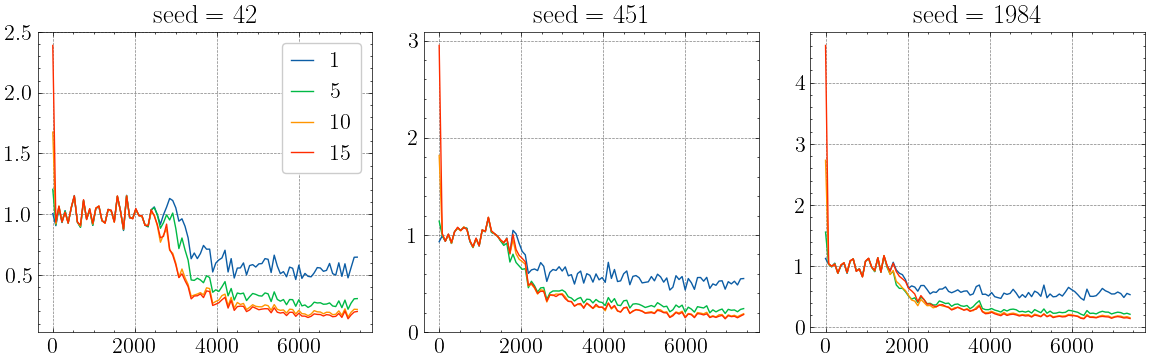

In [99]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, seed in enumerate(seeds):
    for b in x[:4]:
        loss = load_data(f'small_{b}_{seed}')['loss']
        axs[i].plot(np.arange(0, 7500, 75), loss[::75], label = f'{b}')
    axs[i].title.set_text(f'seed = {seed}')
    # axs[i].set_yscale('log')
axs[0].legend(handlelength=1.0)

plt.tight_layout()
plt.savefig('./loss comparison.svg')
plt.show()

In [5]:
with open('./data/evaluation.json', 'r') as f:
    results = json.loads(f.read())

In [6]:
models = results.keys()

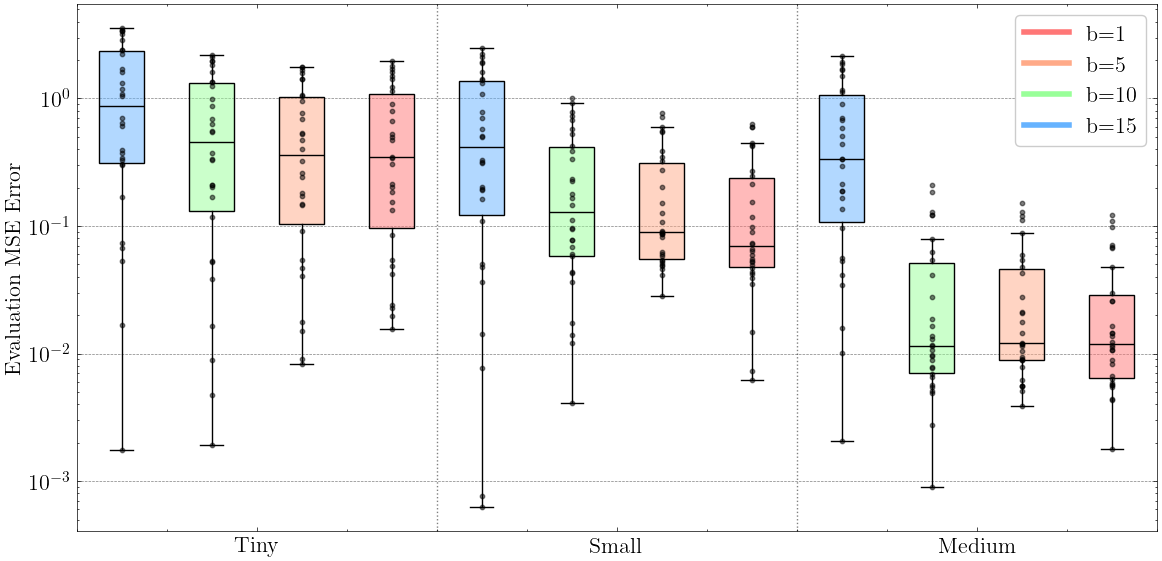

In [9]:
# Prepare data for boxplot
boxplot_data = []
labels = []

models = ['tiny', 'small', 'medium']
bs = [1, 5, 10, 15]

for model in models:
    for b in bs:
        key = f"{model}_{b}"
        boxplot_data.append(results[key])
        labels.append(key)

# Create the boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(boxplot_data, patch_artist=True, notch=False, vert=True, zorder=1, showfliers=False)

# Define colors for the boxplots
colors = ['#FF7777', '#FFAA88', '#99FF99', '#66B3FF'][::-1]
for i, patch in enumerate(box['boxes']):
    model_index = i // len(bs)  # Determine the model index
    # patch.set_alpha(0.5)
    patch.set_edgecolor('black')
    patch.set_facecolor(colors[i % len(colors)])  # Set color based on hyperparameter
    
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.5))
    
    data = boxplot_data[i]
    y = np.random.normal(i + 1, 0.0, size=len(data))
    plt.scatter(y, data, alpha = 0.5, color = 'black', s = 10, zorder = 2)
    
for median in box['medians']:
    median.set_color('black')

# Adding legend
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(bs))][::-1]
labels_legend = [f'b={b}' for b in [1, 5, 10, 15]]
plt.legend(handles, labels_legend, loc='upper right', ncol=1)

# Set x-ticks and labels
plt.xticks([2.5, 6.5, 10.5], ['Medium', 'Small', 'Tiny'][::-1], rotation = 0)
plt.ylabel('Evaluation MSE Error')
plt.grid(False, axis='x')

plt.axvline(4.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(8.5, 0, alpha = 0.5, color = 'black', linestyle = ':')

plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.savefig('./performance 1.svg')
plt.show()